In [1]:
import pandas as pd
from random import choice
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import get_named_colors_mapping
import matplotlib.animation as animation
from IPython.display import HTML
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./inputs/owid-covid-data.csv")

In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58169 entries, 0 to 58168
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57836 non-null  object 
 1   continent                           57487 non-null  object 
 2   location                            58169 non-null  object 
 3   date                                58169 non-null  object 
 4   total_cases                         57626 non-null  float64
 5   new_cases                           57619 non-null  float64
 6   new_cases_smoothed                  56664 non-null  float64
 7   total_deaths                        49303 non-null  float64
 8   new_deaths                          49302 non-null  float64
 9   new_deaths_smoothed                 56664 non-null  float64
 10  total_cases_per_million             57293 non-null  float64
 11  new_cases_per_million               57286

In [5]:
data2 = data[["location","date","total_cases"]]

In [6]:
data2[["date"]]= data2[["date"]].apply(pd.to_datetime)

In [7]:
data2.info(),data2.date.min()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58169 entries, 0 to 58168
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     58169 non-null  object        
 1   date         58169 non-null  datetime64[ns]
 2   total_cases  57626 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ MB


(None, Timestamp('2020-01-01 00:00:00'))

In [8]:
data2["days"] = ((data2["date"]-data2.date.min()).astype(int)/10e8)/86400

In [9]:
data2.head()

,location,date,total_cases,days
0,Afghanistan,2020-02-24,1.0,54.0
1,Afghanistan,2020-02-25,1.0,55.0
2,Afghanistan,2020-02-26,1.0,56.0
3,Afghanistan,2020-02-27,1.0,57.0
4,Afghanistan,2020-02-28,1.0,58.0


In [10]:
data2.days.max()

369.0

In [11]:
data2.dtypes

location               object
date           datetime64[ns]
total_cases           float64
days                  float64
dtype: object

In [12]:
data2["day"] = data2['date'].map(lambda x: x.day)
data2["month"] = data2['date'].map(lambda x: x.month)
data2["year"] = data2['date'].map(lambda x: x.year)
data2.head()

,location,date,total_cases,days,day,month,year
0,Afghanistan,2020-02-24,1.0,54.0,24,2,2020
1,Afghanistan,2020-02-25,1.0,55.0,25,2,2020
2,Afghanistan,2020-02-26,1.0,56.0,26,2,2020
3,Afghanistan,2020-02-27,1.0,57.0,27,2,2020
4,Afghanistan,2020-02-28,1.0,58.0,28,2,2020


In [13]:
data2= data2.drop(columns=["date","year"], index=1)

In [14]:
data2.head()

,location,total_cases,days,day,month
0,Afghanistan,1.0,54.0,24,2
2,Afghanistan,1.0,56.0,26,2
3,Afghanistan,1.0,57.0,27,2
4,Afghanistan,1.0,58.0,28,2
5,Afghanistan,1.0,59.0,29,2


In [15]:
#data2.set_index("location")
#data2.head()
data2 = data2.groupby(["location", "days"], as_index= False).sum()

In [16]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
58163,Zimbabwe,365.0,13867.0,31,12
58164,Zimbabwe,366.0,14084.0,1,1
58165,Zimbabwe,367.0,14491.0,2,1
58166,Zimbabwe,368.0,15265.0,3,1


In [17]:
data2.columns

Index(['location', 'days', 'total_cases', 'day', 'month'], dtype='object')

In [18]:
data2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            58158, 58159, 58160, 58161, 58162, 58163, 58164, 58165, 58166,
            58167],
           dtype='int64', length=58168)

In [19]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
58163,Zimbabwe,365.0,13867.0,31,12
58164,Zimbabwe,366.0,14084.0,1,1
58165,Zimbabwe,367.0,14491.0,2,1
58166,Zimbabwe,368.0,15265.0,3,1


In [20]:
data2 = data2[~data2["location"].str.contains("World")]
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
58163,Zimbabwe,365.0,13867.0,31,12
58164,Zimbabwe,366.0,14084.0,1,1
58165,Zimbabwe,367.0,14491.0,2,1
58166,Zimbabwe,368.0,15265.0,3,1


In [21]:
data2.days.max()

369.0

,location,days,total_cases,day,month
33899,Mexico,150.0,87512.0,30,5
9358,Canada,150.0,91681.0,30,5
10554,Chile,150.0,118720.0,30,5
24554,Iran,150.0,148950.0,30,5
40948,Peru,150.0,155671.0,30,5
53516,Turkey,150.0,163103.0,30,5
23591,India,150.0,181827.0,30,5
19857,Germany,150.0,183189.0,30,5
18608,France,150.0,190744.0,30,5
25866,Italy,150.0,232664.0,30,5


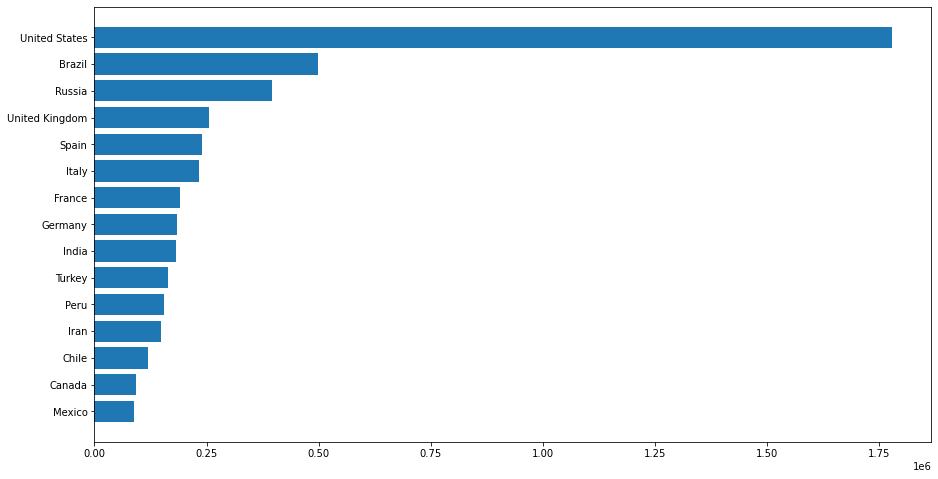

In [22]:
current_days=150
dff=(data2[data2.days.eq(current_days)].sort_values(by='total_cases', ascending=True).tail(15))
#dff[dff.location=="World"]


display(dff)

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.location, dff.total_cases);

In [23]:
countries = list(set(data2.location.tolist()))
values = get_named_colors_mapping().values()

values_list = list(values)

Text(1, 0.4, 'May')

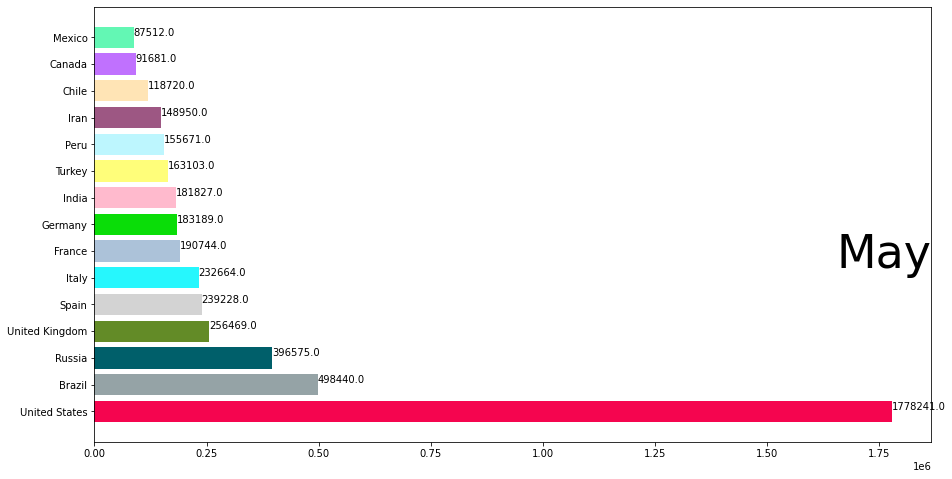

In [24]:
colors=dict(zip(countries,
                [choice(values_list)for x in countries]))

fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   

ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])

for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'])):
    #ax.text(value, i,     name,            ha='right')  
    ax.text(value, i,     value,           ha='left',va='bottom')   

ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')

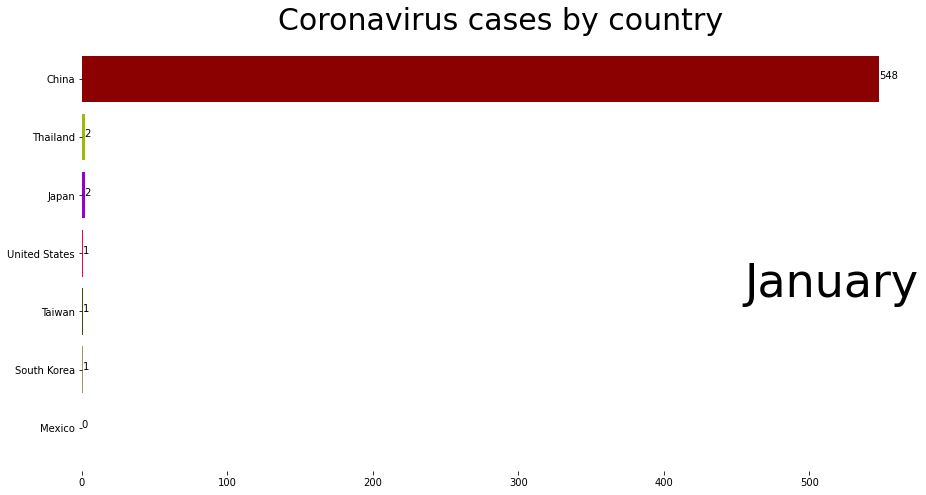

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchar(day):
    dff=(data2[data2.days.eq(day)].sort_values(by='total_cases', ascending=True).tail(10))
    ax.clear()
    ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])
    
    for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'].astype(int))):
        #ax.text(value, i,     name,            ha='right')  
        ax.text(value, i,     value,           ha='left')   

    
    ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')
    #ax.text(1, 0.4, month, transform=ax.transAxes, size=46, ha='right')
    ax.set_title('Coronavirus cases by country', fontdict={'fontsize': 30})
    plt.box(False)
    
draw_barchar(21)

In [26]:
'''
fig, ax = plt.subplots(figsize=(15, 8))

animator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))

HTML(animator.to_jshtml()) 
animator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)
animator.save('outputs/race.gif', writer='imagemagick')
'''

'\nfig, ax = plt.subplots(figsize=(15, 8))\n\nanimator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))\n\nHTML(animator.to_jshtml()) \nanimator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)\nanimator.save(\'outputs/race.gif\', writer=\'imagemagick\')\n'

In [27]:
data = data[~data["location"].str.contains("World")]
data = data[~data["location"].str.contains("International")]
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58164,ZWE,Africa,Zimbabwe,2020-12-31,13867.0,242.0,154.429,363.0,3.0,3.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
58165,ZWE,Africa,Zimbabwe,2021-01-01,14084.0,217.0,172.000,369.0,6.0,4.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
58166,ZWE,Africa,Zimbabwe,2021-01-02,14491.0,407.0,218.286,377.0,8.0,5.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
58167,ZWE,Africa,Zimbabwe,2021-01-03,15265.0,774.0,312.571,380.0,3.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [28]:
df_values, df_ranks = bcr.prepare_long_data(data, index='date', columns='location',
                                            values='total_cases', steps_per_period=1)

df_values

location,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,51526.0,58316.0,99610.0,8049.0,17553.0,159.0,1625514.0,159409.0,28425.0,360815.0,...,19968087.0,19119.0,77060.0,1.0,27.0,113558.0,1465.0,2099.0,20725.0,13867.0
2021-01-01,51526.0,58316.0,99897.0,8117.0,17568.0,159.0,1629594.0,159738.0,28460.0,362911.0,...,20128693.0,19753.0,77182.0,1.0,27.0,113884.0,1474.0,2101.0,20997.0,14084.0
2021-01-02,51526.0,58991.0,100159.0,8166.0,17608.0,159.0,1634834.0,159798.0,28484.0,364302.0,...,20426184.0,20275.0,77182.0,1.0,27.0,114083.0,1482.0,2101.0,21230.0,14491.0


In [29]:
df_values = df_values.fillna(0)
df_values

location,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,51526.0,58316.0,99610.0,8049.0,17553.0,159.0,1625514.0,159409.0,28425.0,360815.0,...,19968087.0,19119.0,77060.0,1.0,27.0,113558.0,1465.0,2099.0,20725.0,13867.0
2021-01-01,51526.0,58316.0,99897.0,8117.0,17568.0,159.0,1629594.0,159738.0,28460.0,362911.0,...,20128693.0,19753.0,77182.0,1.0,27.0,113884.0,1474.0,2101.0,20997.0,14084.0
2021-01-02,51526.0,58991.0,100159.0,8166.0,17608.0,159.0,1634834.0,159798.0,28484.0,364302.0,...,20426184.0,20275.0,77182.0,1.0,27.0,114083.0,1482.0,2101.0,21230.0,14491.0


In [30]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=15,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=5,
                   filename='outputs/covid19_vert2.mp4')

CPU times: user 6min 20s, sys: 3min 2s, total: 9min 22s
Wall time: 3min 20s


In [31]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=15,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=5,
                   filename='outputs/race.gif')

CPU times: user 5min 53s, sys: 2min 44s, total: 8min 37s
Wall time: 7min 31s


In [32]:
df_values2, df_ranks2 = bcr.prepare_long_data(data, index='date', columns='location',
                                            values='new_cases', steps_per_period=1)

df_values2 = df_values2.fillna(0)
df_values2

location,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,121.0,589.0,299.0,66.0,120.0,1.0,11586.0,531.0,20.0,2913.0,...,227315.0,639.0,75.0,0.0,0.0,437.0,9.0,2.0,263.0,242.0
2021-01-01,0.0,0.0,287.0,68.0,15.0,0.0,4080.0,329.0,35.0,2096.0,...,160606.0,634.0,122.0,0.0,0.0,326.0,9.0,2.0,272.0,217.0
2021-01-02,0.0,675.0,262.0,49.0,40.0,0.0,5240.0,60.0,24.0,1391.0,...,297491.0,522.0,0.0,0.0,0.0,199.0,8.0,0.0,233.0,407.0


In [33]:
import plotly.express as px


fig = px.line(df_values2, x="date", y="location", color='country')
fig.show()


ModuleNotFoundError: No module named 'plotly'